In [18]:
import numpy as np
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences, savgol_filter
# Automatic Gain Control=Checked,IR PA (mA)=10,Red PA (mA)=10,IR LED Range (mA)=51,Red LED Range (mA)=51,ALC + FDM=Checked,
# Sample Rate (Hz)=100,Pulse Width (usec)=400,ADC Range (nA)=32768,FIFO Rolls on Full=Checked,FIFO Almost Full=17,Sample 
# Averaging=1,IA Gain=5,ECG Gain=8,Sample Rate=200,Adaptive Filter=Checked,Notch Freq=60,Cutoff Freq=50,

In [25]:
def convert_to_sec(t):
    t = t[14:]
    min = float(t[:t.find(":")])
    sec = float(t[t.find(":")+1:])
    total = (min*60)+sec
    return total

In [5]:
df = pd.read_csv("C:\\Users\pazul\Documents\BMEN 207\Honors Project\Coding\data\ECPPG_2023-10-21_21-29-57.csv")
df.head

<bound method NDFrame.head of                          Time   Sample Count   IR Count   Red Count   Raw ECG  \
0     2023-10-21 21:30:51.750          11728     233049      209594     -7427   
1     2023-10-21 21:30:51.782          11729     233094      209607     -7419   
2     2023-10-21 21:30:51.783          11730     233090      209595     -7526   
3     2023-10-21 21:30:51.783          11731     233113      209598     -7379   
4     2023-10-21 21:30:51.783          11732     233142      209611     -7651   
...                       ...            ...        ...         ...       ...   
5020  2023-10-21 21:31:16.861          16748     237060      206019      3901   
5021  2023-10-21 21:31:16.861          16749     237052      206017      3765   
5022  2023-10-21 21:31:16.861          16750     237040      205990      3965   
5023  2023-10-21 21:31:16.861          16751     237056      205995      3713   
5024  2023-10-21 21:31:16.861          16752     237052      205999      3722  

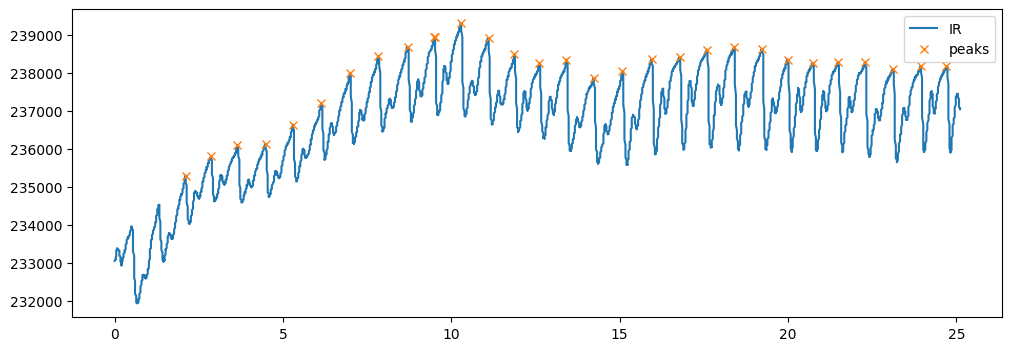

In [78]:
time = np.array([convert_to_sec(x) for x in df["Time"]]) - convert_to_sec(df["Time"][0])
time_cut = time[3000:]
IR_Count = df[" IR Count"]
IR_Count_cut = IR_Count[3000:]
Red_Count = df[" Red Count"]

peaks, _ = find_peaks(IR_Count, width= 20, height=235000)


plt.figure(figsize=(12,4))
plt.plot(time, IR_Count, label = "IR")
plt.plot(time[peaks], IR_Count[peaks], "x", label = "peaks")
plt.legend()
plt.show()

In [79]:
peak_times = sorted(list(set(np.round(time[peaks], 3))))
peak_vals = IR_Count[peaks]

print(peak_vals)
print(peak_times)
bpm = 60*(1/np.mean(np.diff(peak_times)))
print(bpm)

421     235292
574     235797
732     236093
896     236126
1062    236635
1230    237194
1397    237988
1569    238433
1740    238671
1899    238929
1901    238929
2060    239301
2220    238906
2375    238491
2526    238246
2685    238344
2850    237861
3020    238043
3195    238361
3358    238411
3521    238605
3684    238664
3844    238635
3998    238347
4149    238252
4300    238274
4462    238276
4623    238095
4790    238167
4944    238172
Name:  IR Count, dtype: int64
[2.11, 2.858, 3.642, 4.484, 5.295, 6.14, 6.985, 7.827, 8.702, 9.486, 9.518, 10.295, 11.111, 11.86, 12.609, 13.42, 14.233, 15.077, 15.953, 16.799, 17.609, 18.389, 19.234, 19.986, 20.736, 21.486, 22.299, 23.11, 23.953, 24.704]
77.01159599893778
